<a href="https://colab.research.google.com/github/FatimaQuiEsc/SHEplusplus2019-22/blob/main/SHE%2B%2B_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob as glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Los datos corresponden a un dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/SHE++ 2022/train/*')

In [ ]:
len(files)

4340

In [ ]:
#numero de pixeles para nuestras imágenes. 
num_px=64

In [ ]:
train_x=[]
train_y=[]
for file in files[0:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px)) #se genera un arreglo de num_px de lado
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file: 
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)
#Se asigana un valor al arreglo

In [ ]:
test_x=[]
test_y=[]
for file in files[4300:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file: 
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

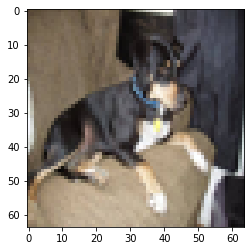

In [ ]:
plt.imshow(train_x[0])

In [ ]:
np.shape(train_x)

(100, 64, 64, 3)

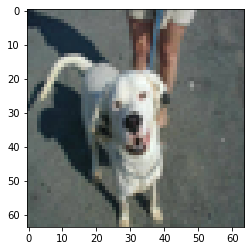

In [ ]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen la imágen para que sean arreglos de una dimensión. 

In [ ]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [ ]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [ ]:
#Función de activación. Sigmpide 
def sigmoid(z):
  s=1./(1+np.exp(-z))
  return s

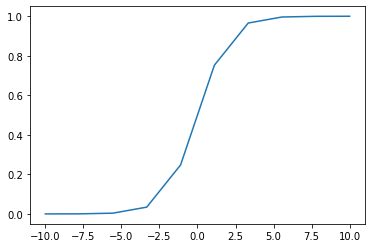

In [ ]:
z=np.linspace(-10,10,10)
plt.plot(z, sigmoid(z))

In [ ]:
#Inicializamos los pesos y los sesgos a cero. 
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.
    return w, b


In [ ]:
#Calculamos nuestra función de activación, función de costo y las derivadas, dw y db
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    #Quita la estructura para dejarlo como un numero
    dw = (1/m)* np.dot(X,(A-Y).T)
    db = (1/m)* np.sum(A-Y)
    cost = np.squeeze(np.array(cost))
    #
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [ ]:
#Realizamos la optimización de nuestra red. 

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    #Calculo de gradientes 
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        #Modulo, division entera 
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
#Calculamos la predicción que hace nuestra función
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
     
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = int(1)
        else:
            Y_prediction[0,i] = int(0)
    
    return Y_prediction

In [ ]:
#Ponemos todo junto en nuestro modelo 
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):  
    w,b=initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w=params["w"]
    b=params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=4000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.427346
Cost after iteration 200: 0.987371
Cost after iteration 300: 0.160595
Cost after iteration 400: 0.091825
Cost after iteration 500: 0.076458
Cost after iteration 600: 0.066472
Cost after iteration 700: 0.059175
Cost after iteration 800: 0.053490
Cost after iteration 900: 0.048882
Cost after iteration 1000: 0.045046
Cost after iteration 1100: 0.041788
Cost after iteration 1200: 0.038982
Cost after iteration 1300: 0.036535
Cost after iteration 1400: 0.034380
Cost after iteration 1500: 0.032467
Cost after iteration 1600: 0.030757
Cost after iteration 1700: 0.029218
Cost after iteration 1800: 0.027826
Cost after iteration 1900: 0.026560
Cost after iteration 2000: 0.025404
Cost after iteration 2100: 0.024345
Cost after iteration 2200: 0.023370
Cost after iteration 2300: 0.022469
Cost after iteration 2400: 0.021636
Cost after iteration 2500: 0.020861
Cost after iteration 2600: 0.020140
Cost after iteration 2700: 0.019467
Cost

y = 1, you predicted that it is a "1.0


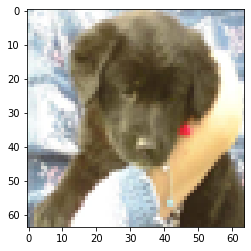

In [ ]:
index= 3
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + str(logistic_regression_model['Y_prediction_test'][0,index]))